<a href="https://colab.research.google.com/github/irasin/pytroch_test/blob/master/081213.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch

    100% |████████████████████████████████| 591.8MB 23kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x60b10000 @  0x7fde3d2442a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


0.9504730105731776

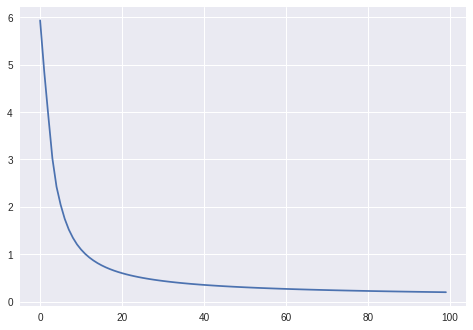

In [6]:
from sklearn.datasets import load_digits
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data
Y = digits.target
X.shape
Y.shape

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(Y, dtype=torch.int64)

X.size()
net = nn.Linear(X.size()[1], 10)
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

loss_log = []
for _ in range(100):
    optimizer.zero_grad()
    y_pred = net(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    loss_log.append(loss.item())

plt.plot(loss_log)
_, y_pred = torch.max(net(X), 1)
(y_pred == y).sum().item() / len(y)

################################################


0.9994435169727324

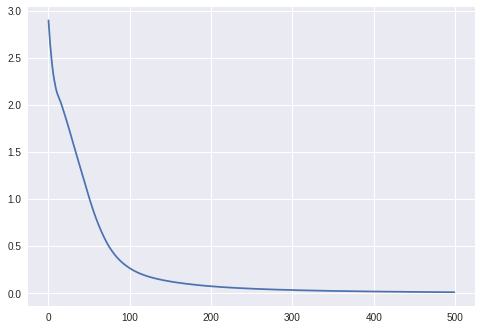

In [7]:
net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
    )

optimizer = optim.Adam(net.parameters())

loss_log = []
for _ in range(500):
    optimizer.zero_grad()
    y_pred = net(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    loss_log.append(loss.item())

plt.plot(loss_log)
_, y_pred = torch.max(net(X), 1)
(y_pred == y).sum().item() / len(y)
################################################


0.9666110183639399

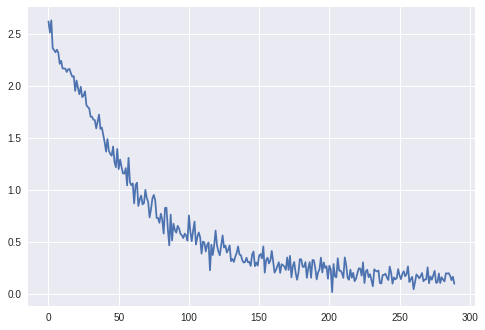

In [8]:
digits = load_digits()
X = digits.data
Y = digits.target


X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(Y, dtype=torch.int64)
dataset = TensorDataset(X, y)
X.dtype
loader = DataLoader(dataset, batch_size=64, shuffle=True)


net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
    )

optimizer = optim.Adam(net.parameters())
criterion = nn.CrossEntropyLoss()
def _update(optimizer, loss):
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

loss_log = []
for _ in range(10):
    for xx, yy in loader:
        y_pred = net(xx)
        loss = criterion(y_pred, yy)
        _update(optimizer, loss)
        loss_log.append(loss.item())

plt.plot(loss_log)
_, y_pred = torch.max(net(X), 1)
(y_pred == y).sum().item() / len(y)
################################################


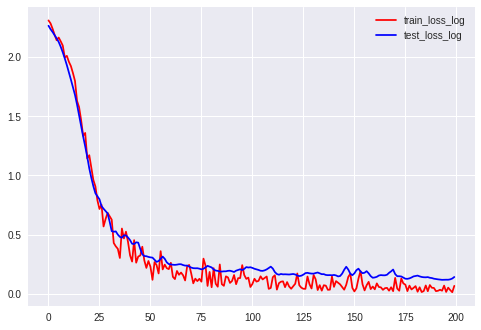

In [9]:


digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)

ds = TensorDataset(X_train, y_train)
loader = DataLoader(ds, batch_size=64, shuffle=True)

net = nn.Sequential(
    nn.Linear(64, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10))

optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
def _update(optimizer, loss):
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

train_loss_log = []
test_loss_log = []
for _ in range(10):
    for xx, yy in loader:
        y_train_pred = net(xx)
        train_loss = criterion(y_train_pred, yy)
        _update(optimizer, train_loss)
        train_loss_log.append(train_loss.item())
        y_test_pred = net(X_test)
        test_loss = criterion(y_test_pred, y_test)
        test_loss_log.append(test_loss.item())

plt.plot(train_loss_log, c='r', label='train_loss_log')
plt.plot(test_loss_log, c='b', label='test_loss_log')
plt.legend()

#######################################################


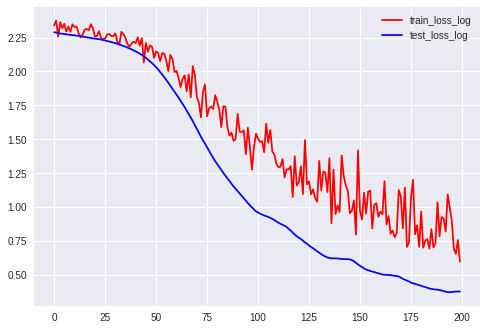

In [10]:

digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)

ds = TensorDataset(X_train, y_train)
loader = DataLoader(ds, batch_size=64, shuffle=True)

net = nn.Sequential(
    nn.Linear(64, 100),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(100, 10))

optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
def _update(optimizer, loss):
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

train_loss_log = []
test_loss_log = []
for _ in range(10):
    for xx, yy in loader:
        net.train()
        y_train_pred = net(xx)
        train_loss = criterion(y_train_pred, yy)
        _update(optimizer, train_loss)
        train_loss_log.append(train_loss.item())
        net.eval()
        y_test_pred = net(X_test)
        test_loss = criterion(y_test_pred, y_test)
        test_loss_log.append(test_loss.item())

plt.plot(train_loss_log, c='r', label='train_loss_log')
plt.plot(test_loss_log, c='b', label='test_loss_log')
plt.legend()
#####################################################


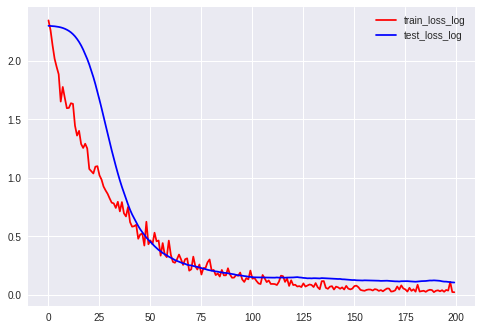

In [11]:

digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)

ds = TensorDataset(X_train, y_train)
loader = DataLoader(ds, batch_size=64, shuffle=True)

net = nn.Sequential(
    nn.Linear(64, 100),
    nn.ReLU(),
    nn.BatchNorm1d(100),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.BatchNorm1d(100),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.BatchNorm1d(100),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.BatchNorm1d(100),
    nn.Linear(100, 10))

optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
def _update(optimizer, loss):
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

train_loss_log = []
test_loss_log = []
for _ in range(10):
    for xx, yy in loader:
        net.train()
        y_train_pred = net(xx)
        train_loss = criterion(y_train_pred, yy)
        _update(optimizer, train_loss)
        train_loss_log.append(train_loss.item())
        net.eval()
        y_test_pred = net(X_test)
        test_loss = criterion(y_test_pred, y_test)
        test_loss_log.append(test_loss.item())

plt.plot(train_loss_log, c='r', label='train_loss_log')
plt.plot(test_loss_log, c='b', label='test_loss_log')
plt.legend()
###################################################


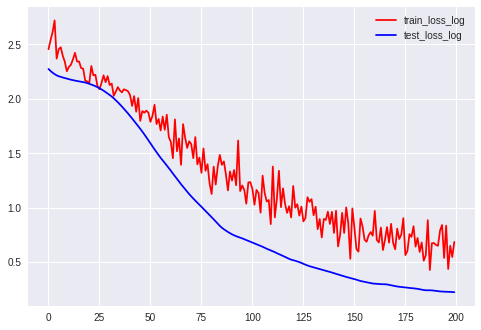

In [12]:

class LRD(nn.Module):
    """"Linear-ReLU-Dropout layer"""
    def __init__(self, in_features, out_features, bias=True, p=0.5):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features, bias=bias)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=p)

    def forward(self, x):
        y = self.linear(x)
        y = self.relu(y)
        y = self.dropout(y)
        return y

class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.lrd1 = LRD(64, 100)
        self.lrd2 = LRD(100, 100)
        self.lrd3 = LRD(100, 100)
        self.l4 = nn.Linear(100, 10)

    def forward(self, x):
        y = self.lrd1(x)
        y = self.lrd2(y)
        y = self.lrd3(y)
        y = self.l4(y)
        return y

digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)

ds = TensorDataset(X_train, y_train)
loader = DataLoader(ds, batch_size=64, shuffle=True)

net = MyNet()

optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
def _update(optimizer, loss):
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

train_loss_log = []
test_loss_log = []
for _ in range(10):
    for xx, yy in loader:
        net.train()
        y_train_pred = net(xx)
        train_loss = criterion(y_train_pred, yy)
        _update(optimizer, train_loss)
        train_loss_log.append(train_loss.item())
        net.eval()
        y_test_pred = net(X_test)
        test_loss = criterion(y_test_pred, y_test)
        test_loss_log.append(test_loss.item())

plt.plot(train_loss_log, c='r', label='train_loss_log')
plt.plot(test_loss_log, c='b', label='test_loss_log')
plt.legend()
#########################################################
